In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31136f2fcced0d9407630756aa15f0d7


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | santa fe
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | santa marta
Processing Record 8 of Set 1 | mae sai
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | gobabis
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | sorland
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | wahiawa
Processing Record 18 of Set 1 | buchanan
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | mataura
Processing Record 23 

Processing Record 42 of Set 4 | morant bay
Processing Record 43 of Set 4 | coruripe
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | viligili
City not found. Skipping...
Processing Record 47 of Set 4 | nishihara
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | cristalina
Processing Record 2 of Set 5 | darhan
Processing Record 3 of Set 5 | ocampo
Processing Record 4 of Set 5 | amapa
Processing Record 5 of Set 5 | mineral wells
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | izberbash
Processing Record 8 of Set 5 | vangaindrano
Processing Record 9 of Set 5 | meyungs
City not found. Skipping...
Processing Record 10 of Set 5 | pilos
City not found. Skipping...
Processing Record 11 of Set 5 | zahesi
Processing Record 12 of Set 5 | farah
Processing Record 13 of Set 5 | camacha


Processing Record 31 of Set 8 | hammerfest
Processing Record 32 of Set 8 | san policarpo
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | lloydminster
Processing Record 35 of Set 8 | afgoye
City not found. Skipping...
Processing Record 36 of Set 8 | plettenberg bay
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | yeehaw junction
City not found. Skipping...
Processing Record 39 of Set 8 | chandbali
Processing Record 40 of Set 8 | lakatoro
Processing Record 41 of Set 8 | ephrata
Processing Record 42 of Set 8 | georgetown
Processing Record 43 of Set 8 | kanevskaya
Processing Record 44 of Set 8 | greensburg
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | virginia beach
Processing Record 47 of Set 8 | ust-kut
Processing Record 48 of Set 8 | praia da vitoria
Processing Record 49 of Set 8 | san vicente
Processing Record 50 of Set 8 | mount gambier
Processing Record 1 of Set 9 | los llanos de aridane
Pro

Processing Record 17 of Set 12 | kamina
Processing Record 18 of Set 12 | kirkwall
Processing Record 19 of Set 12 | katsuura
Processing Record 20 of Set 12 | acapulco
Processing Record 21 of Set 12 | toamasina
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | yovon
Processing Record 24 of Set 12 | sakata
Processing Record 25 of Set 12 | reserva
Processing Record 26 of Set 12 | gisborne
Processing Record 27 of Set 12 | trn
Processing Record 28 of Set 12 | tessalit
Processing Record 29 of Set 12 | zyryanka
Processing Record 30 of Set 12 | zaysan
Processing Record 31 of Set 12 | handan
Processing Record 32 of Set 12 | antofagasta
Processing Record 33 of Set 12 | san javier
Processing Record 34 of Set 12 | nara
Processing Record 35 of Set 12 | angoram
Processing Record 36 of Set 12 | mehamn
Processing Record 37 of Set 12 | cornedo vicentino
Processing Record 38 of Set 12 | neuquen
Processing Record 39 of Set 12 | bandarbeyla
Processing Record 40 of Set 12 | purpe
Pro

In [14]:
len(city_data)

560

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,76.98,85,100,3.87,ID,2021-05-22 03:32:45
1,Hasaki,35.7333,140.8333,70.20,77,100,19.73,JP,2021-05-22 03:32:45
2,Narsaq,60.9167,-46.0500,34.02,85,97,5.64,GL,2021-05-22 03:32:45
3,Santa Fe,-31.6333,-60.7000,55.02,93,97,4.00,AR,2021-05-22 03:32:46
4,Busselton,-33.6500,115.3333,62.10,86,100,18.25,AU,2021-05-22 03:32:46
5,Albany,42.6001,-73.9662,72.01,63,100,3.24,US,2021-05-22 03:30:07
6,Santa Marta,11.2408,-74.1990,86.05,83,75,6.85,CO,2021-05-22 03:31:53
7,Mae Sai,20.4335,99.8762,91.44,39,20,3.98,TH,2021-05-22 03:32:47
8,Barrow,71.2906,-156.7887,33.82,80,90,19.57,US,2021-05-22 03:32:47
9,Saskylakh,71.9167,114.0833,25.90,85,54,4.52,RU,2021-05-22 03:32:47


In [17]:
df_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[df_columns]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2021-05-22 03:32:45,-3.8004,102.2655,76.98,85,100,3.87
1,Hasaki,JP,2021-05-22 03:32:45,35.7333,140.8333,70.20,77,100,19.73
2,Narsaq,GL,2021-05-22 03:32:45,60.9167,-46.0500,34.02,85,97,5.64
3,Santa Fe,AR,2021-05-22 03:32:46,-31.6333,-60.7000,55.02,93,97,4.00
4,Busselton,AU,2021-05-22 03:32:46,-33.6500,115.3333,62.10,86,100,18.25
5,Albany,US,2021-05-22 03:30:07,42.6001,-73.9662,72.01,63,100,3.24
6,Santa Marta,CO,2021-05-22 03:31:53,11.2408,-74.1990,86.05,83,75,6.85
7,Mae Sai,TH,2021-05-22 03:32:47,20.4335,99.8762,91.44,39,20,3.98
8,Barrow,US,2021-05-22 03:32:47,71.2906,-156.7887,33.82,80,90,19.57
9,Saskylakh,RU,2021-05-22 03:32:47,71.9167,114.0833,25.90,85,54,4.52


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

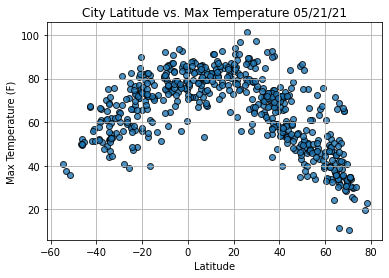

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

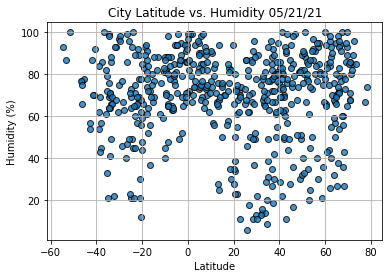

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

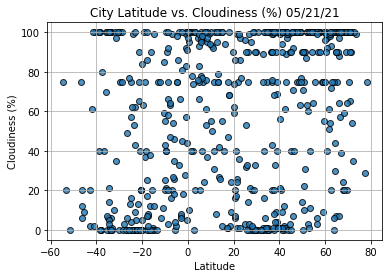

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

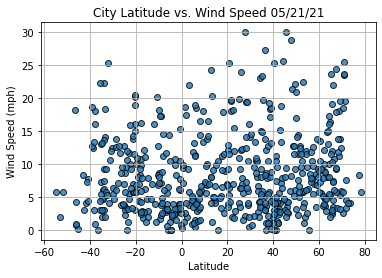

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hasaki,JP,2021-05-22 03:32:45,35.7333,140.8333,70.20,77,100,19.73
2,Narsaq,GL,2021-05-22 03:32:45,60.9167,-46.0500,34.02,85,97,5.64
5,Albany,US,2021-05-22 03:30:07,42.6001,-73.9662,72.01,63,100,3.24
6,Santa Marta,CO,2021-05-22 03:31:53,11.2408,-74.1990,86.05,83,75,6.85
7,Mae Sai,TH,2021-05-22 03:32:47,20.4335,99.8762,91.44,39,20,3.98


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

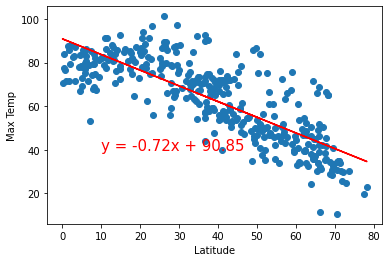

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

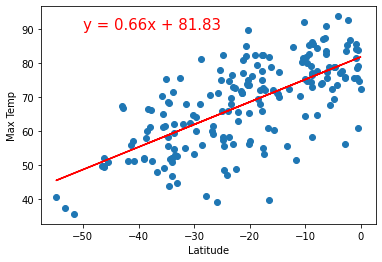

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

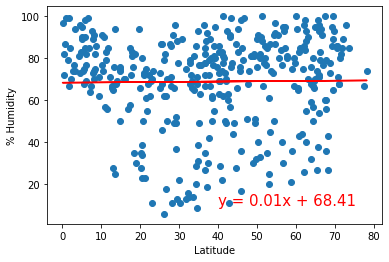

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

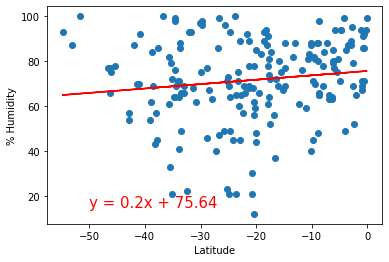

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

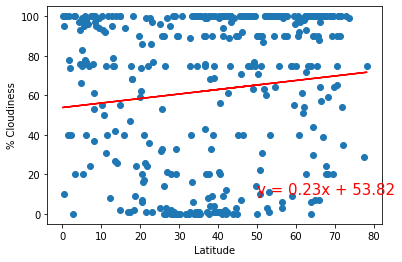

In [37]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,10))



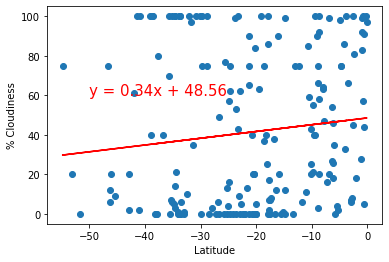

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

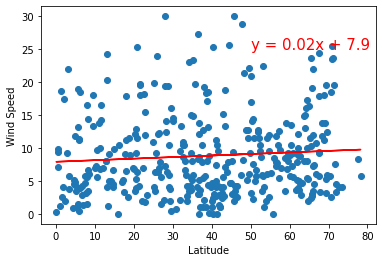

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,25))

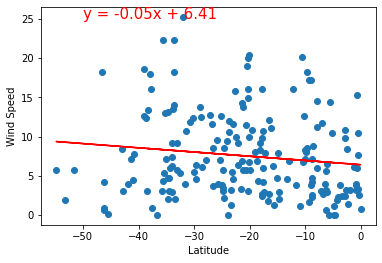

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))
